In [1]:
using CSV

In [90]:
using Plots, SparseArrays, LightGraphs, GraphPlot

In [2]:
#cd("/home/michael/agg_epi_mobility")
cd("/Users/michael/work/data/agg_epi_mobility")

In [4]:
base=CSV.read("agg_epi_mobility_covid_base")

161628992×8 DataFrames.DataFrame. Omitted printing of 4 columns
│ Row       │ 2019-11-17_2019-11-23 │ 3a268cb │ 21.317945 │ 83.003906 │
│           │ String                │ String  │ Float64   │ Float64   │
├───────────┼───────────────────────┼─────────┼───────────┼───────────┤
│ 1         │ 2019-12-15_2019-12-21 │ 357b435 │ 37.2704   │ 127.029   │
│ 2         │ 2020-03-01_2020-03-07 │ 473e015 │ 49.4483   │ 20.4136   │
│ 3         │ 2020-01-12_2020-01-18 │ 3ba7efb │ 10.5298   │ 76.2363   │
│ 4         │ 2020-03-15_2020-03-21 │ 46e6319 │ 55.7228   │ 24.3154   │
│ 5         │ 2019-12-29_2020-01-04 │ 1e9597d │ -26.1726  │ 27.7021   │
│ 6         │ 2019-12-08_2019-12-14 │ 3a531bb │ 12.4874   │ 79.8633   │
│ 7         │ 2020-01-05_2020-01-11 │ 8834eef │ 40.4021   │ -79.8633  │
│ 8         │ 2020-03-15_2020-03-21 │ 357b159 │ 37.1161   │ 126.943   │
│ 9         │ 2020-03-01_2020-03-07 │ 357ca17 │ 37.5002   │ 127.008   │
│ 10        │ 2019-12-29_2020-01-04 │ 357ca33 │ 37.574    │ 127.008   │
⋮
│ 161628982 │ 2020-02-09_2020-02-15 │ 395e861 │ 22.9881   │ 72.6269   │
│ 161628983 │ 2020-03-08_2020-03-14 │ 12a4ba5 │ 41.4689   │ 2.27289   │
│ 161628984 │ 2019-11-17_2019-11-23 │ 601c347 │ 36.1986   │ 138.469   │
│ 161628985 │ 2020-02-16_2020-02-22 │ 80deaa3 │ 32.7448   │ -117.256  │
│ 161628986 │ 2019-11-17_2019-11-23 │ 4730c15 │ 48.9054   │ 24.7119   │
│ 161628987 │ 2019-11-03_2019-11-09 │ 601b21f │ 34.8452   │ 137.754   │
│ 161628988 │ 2019-12-01_2019-12-07 │ 94fe9af │ -28.3124  │ -54.2266  │
│ 161628989 │ 2019-12-22_2019-12-28 │ 39fa591 │ 24.8311   │ 87.9629   │
│ 161628990 │ 2019-11-24_2019-11-30 │ 88051a7 │ 43.0111   │ -87.9629  │
│ 161628991 │ 2020-01-19_2020-01-25 │ 880fb09 │ 42.0503   │ -87.9629  │
│ 161628992 │ 2019-10-27_2019-11-02 │ 4774207 │ 47.9619   │ 13.2463   │

In [5]:
base[1,:]

DataFrameRow. Omitted printing of 3 columns
│ Row │ 2019-11-17_2019-11-23 │ 3a268cb │ 21.317945 │ 83.003906 │ 3a268cb_1 │
│     │ String                │ String  │ Float64   │ Float64   │ String    │
├─────┼───────────────────────┼─────────┼───────────┼───────────┼───────────┤
│ 1   │ 2019-12-15_2019-12-21 │ 357b435 │ 37.2704   │ 127.029   │ 357b459   │

In [6]:
weeks=unique(base[:,1])

21-element Array{String,1}:
 "2019-12-15_2019-12-21"
 "2020-03-01_2020-03-07"
 "2020-01-12_2020-01-18"
 "2020-03-15_2020-03-21"
 "2019-12-29_2020-01-04"
 "2019-12-08_2019-12-14"
 "2020-01-05_2020-01-11"
 "2020-02-02_2020-02-08"
 "2020-02-23_2020-02-29"
 "2020-01-26_2020-02-01"
 "2020-02-16_2020-02-22"
 "2019-11-10_2019-11-16"
 "2019-11-17_2019-11-23"
 "2020-03-08_2020-03-14"
 "2020-02-09_2020-02-15"
 "2020-01-19_2020-01-25"
 "2019-11-03_2019-11-09"
 "2019-12-01_2019-12-07"
 "2019-12-22_2019-12-28"
 "2019-11-24_2019-11-30"
 "2019-10-27_2019-11-02"

In [92]:
base1=base[base[:,1].==weeks[3],:]

7857367×8 DataFrames.DataFrame. Omitted printing of 4 columns
│ Row     │ 2019-11-17_2019-11-23 │ 3a268cb │ 21.317945 │ 83.003906 │
│         │ String                │ String  │ Float64   │ Float64   │
├─────────┼───────────────────────┼─────────┼───────────┼───────────┤
│ 1       │ 2020-01-12_2020-01-18 │ 3ba7efb │ 10.5298   │ 76.2363   │
│ 2       │ 2020-01-12_2020-01-18 │ 07ab6af │ -7.82494  │ -34.8955  │
│ 3       │ 2020-01-12_2020-01-18 │ 809143f │ 37.3444   │ -120.447  │
│ 4       │ 2020-01-12_2020-01-18 │ 398cd4b │ 24.7357   │ 84.9297   │
│ 5       │ 2020-01-12_2020-01-18 │ 875280d │ 40.4913   │ -111.893  │
│ 6       │ 2020-01-12_2020-01-18 │ 95bcc0b │ -34.6664  │ -58.6573  │
│ 7       │ 2020-01-12_2020-01-18 │ 4139cd1 │ 53.3295   │ 40.6768   │
│ 8       │ 2020-01-12_2020-01-18 │ 47169f9 │ 49.7965   │ 19.0454   │
│ 9       │ 2020-01-12_2020-01-18 │ 86e741b │ 31.7026   │ -106.217  │
│ 10      │ 2020-01-12_2020-01-18 │ 865c89b │ 29.6465   │ -98.4513  │
⋮
│ 7857357 │ 2020-01-12_2020-01-18 │ 96696bb │ -37.0388  │ -72.3903  │
│ 7857358 │ 2020-01-12_2020-01-18 │ 1531e6b │ 37.0632   │ 37.3934   │
│ 7857359 │ 2020-01-12_2020-01-18 │ 3a4d0e7 │ 13.8122   │ 79.9528   │
│ 7857360 │ 2020-01-12_2020-01-18 │ 46b5367 │ 55.8291   │ 37.6288   │
│ 7857361 │ 2020-01-12_2020-01-18 │ 38deca3 │ 34.1899   │ 72.035    │
│ 7857362 │ 2020-01-12_2020-01-18 │ 89c6c41 │ 39.9184   │ -75.2362  │
│ 7857363 │ 2020-01-12_2020-01-18 │ 4cc9287 │ 45.645    │ -73.8573  │
│ 7857364 │ 2020-01-12_2020-01-18 │ 3a20e41 │ 21.8562   │ 84.0273   │
│ 7857365 │ 2020-01-12_2020-01-18 │ 883cf17 │ 41.8736   │ -84.0273  │
│ 7857366 │ 2020-01-12_2020-01-18 │ 47e6bf1 │ 48.9986   │ 1.69443   │
│ 7857367 │ 2020-01-12_2020-01-18 │ 889be95 │ 30.4162   │ -88.5469  │

In [93]:
labels=unique([base1[:,2]; base1[:,5]])

764538-element Array{String,1}:
 "3ba7efb"
 "07ab6af"
 "809143f"
 "398cd4b"
 "875280d"
 "95bcc0b"
 "4139cd1"
 "47169f9"
 "86e741b"
 "865c89b"
 "4742b73"
 "89a9051"
 "47d802f"
 ⋮
 "38a34c3"
 "4664bc5"
 "4876bbd"
 "8f62ff3"
 "85c4dd3"
 "396e7af"
 "396150f"
 "476580f"
 "470c7dd"
 "3754099"
 "8628df1"
 "3a4a5c1"

In [94]:
    function lineinbox(x,lat,long)
        truth=false
        minlat=lat[1]
        maxlat=lat[2]
        minlng=long[1]
        maxlng=long[2]
#        if x[3]>minlat & x[3]<maxlat & x[4]>minlng & x[4]<maxlng & x[6]>minlat & x[6]<maxlat & x[7]>minlng & x[7]<maxlng 
        if minlat<x[3]<maxlat && minlng<x[4]<maxlng
            if minlat<x[6]<maxlat && minlng<x[7]<maxlng
                truth=true
            end
        end
        return truth
    end   

function inbox(aggtable,lat,long)
    nr,nc=size(aggtable)
    inds=[]
    for i in 1:nr
        if lineinbox(aggtable[i,:],lat,long)
            inds =[inds; i]
        end
    end
    smalltable=aggtable[inds,:]
    return smalltable
end

inbox (generic function with 1 method)

In [95]:
#A bounding box for WA
long=[-36 -13]
latt=[113 129]
#Or a bigger one for Australia
#long=[-50 -10]
#latt=[100 150]

1×2 Array{Int64,2}:
 113  129

In [96]:
wa_base=inbox(base1,long,latt) # points that start and stay in the box

11938×8 DataFrames.DataFrame. Omitted printing of 3 columns
│ Row   │ 2019-11-17_2019-11-23 │ 3a268cb │ 21.317945 │ 83.003906 │ 3a268cb_1 │
│       │ String                │ String  │ Float64   │ Float64   │ String    │
├───────┼───────────────────────┼─────────┼───────────┼───────────┼───────────┤
│ 1     │ 2020-01-12_2020-01-18 │ 2a326e3 │ -32.6416  │ 115.864   │ 2a327eb   │
│ 2     │ 2020-01-12_2020-01-18 │ 2bcd531 │ -31.7259  │ 115.793   │ 2bcd537   │
│ 3     │ 2020-01-12_2020-01-18 │ 2a32af1 │ -31.8958  │ 115.793   │ 2a32bab   │
│ 4     │ 2020-01-12_2020-01-18 │ 2a32a29 │ -32.0814  │ 115.817   │ 2a32a3b   │
│ 5     │ 2020-01-12_2020-01-18 │ 2a32a31 │ -32.0391  │ 115.817   │ 2a32985   │
│ 6     │ 2020-01-12_2020-01-18 │ 2a32bb9 │ -31.9761  │ 115.911   │ 2a32bcb   │
│ 7     │ 2020-01-12_2020-01-18 │ 2a32b9f │ -31.9021  │ 115.959   │ 2a32b75   │
│ 8     │ 2020-01-12_2020-01-18 │ 2a32a4f │ -31.9755  │ 115.817   │ 2a32af9   │
│ 9     │ 2020-01-12_2020-01-18 │ 2a32b1b │ -31.854   │ 115.888   │ 2a32bb9   │
│ 10    │ 2020-01-12_2020-01-18 │ 2bf54c3 │ -20.3229  │ 118.591   │ 2bf54b1   │
⋮
│ 11928 │ 2020-01-12_2020-01-18 │ 2a32adb │ -31.8057  │ 115.817   │ 2a32ac9   │
│ 11929 │ 2020-01-12_2020-01-18 │ 2a32935 │ -32.1407  │ 116.03    │ 2a32951   │
│ 11930 │ 2020-01-12_2020-01-18 │ 2a32b43 │ -31.7909  │ 115.982   │ 2a32b73   │
│ 11931 │ 2020-01-12_2020-01-18 │ 2a2fad5 │ -33.9456  │ 115.082   │ 2a2e503   │
│ 11932 │ 2020-01-12_2020-01-18 │ 2bda469 │ -28.7777  │ 114.607   │ 2bda449   │
│ 11933 │ 2020-01-12_2020-01-18 │ 2a32a59 │ -31.9382  │ 115.793   │ 2a32ae5   │
│ 11934 │ 2020-01-12_2020-01-18 │ 2a327ed │ -32.5251  │ 115.722   │ 2a32bad   │
│ 11935 │ 2020-01-12_2020-01-18 │ 2a32ad3 │ -31.7632  │ 115.817   │ 2bcd549   │
│ 11936 │ 2020-01-12_2020-01-18 │ 2a32eb5 │ -32.1143  │ 116.053   │ 2a32eb7   │
│ 11937 │ 2020-01-12_2020-01-18 │ 2bcd52d │ -31.742   │ 115.817   │ 2bcd52d   │
│ 11938 │ 2020-01-12_2020-01-18 │ 2a32ac3 │ -31.8321  │ 115.793   │ 2a32af9   │

In [99]:
pts=Matrix(wa_base[:,3:4])

11938×2 Array{Float64,2}:
 -32.6416  115.864
 -31.7259  115.793
 -31.8958  115.793
 -32.0814  115.817
 -32.0391  115.817
 -31.9761  115.911
 -31.9021  115.959
 -31.9755  115.817
 -31.854   115.888
 -20.3229  118.591
 -31.9491  115.84
 -32.0282  115.769
 -32.0876  115.982
   ⋮       
 -32.1299  115.982
 -31.8057  115.817
 -32.1407  116.03
 -31.7909  115.982
 -33.9456  115.082
 -28.7777  114.607
 -31.9382  115.793
 -32.5251  115.722
 -31.7632  115.817
 -32.1143  116.053
 -31.742   115.817
 -31.8321  115.793

In [100]:
plot(pts[:,2],pts[:,1],seriestype = :scatter)

In [101]:
wa_base[:,8]

11938-element Array{Float64,1}:
 -15.796
 -14.213
 -14.7169
 -15.3388
 -15.6481
 -14.6096
 -14.2712
 -14.8885
 -16.0411
 -15.3388
 -14.6783
 -15.1703
 -16.1181
   ⋮
 -16.1181
 -15.7816
 -15.7126
 -15.7535
 -15.6734
 -15.8557
 -15.9871
 -16.0789
 -15.7535
 -15.4554
 -13.5749
 -15.3296

In [102]:
function transportmat(aggtable)
    nr,nc=size(aggtable)
    if nc!=8
        println("expected 8 columns, got $nc")
    end
    println("working on $nr rows")
    labels=unique([aggtable[:,2]; aggtable[:,5]])
    nl=length(labels)
    println("$nl unique positions logged")
    indi=Array{Int,1}(undef,nr)
    indj=Array{Int,1}(undef,nr)
    valu=Array{Float64,1}(undef,nr)
    k=1
    for (i,loc) in enumerate(labels)
        indsrc=findall(x->x==loc,aggtable[:,2])
        for j in indsrc
            destlabl=aggtable[j,5]
            inddest=findall(x->x==destlabl,labels)[1]
            indi[k]=i
            indj[k]=inddest
            valu[k]=aggtable[j,8]
            k += 1
        end
    end
    adjmat=sparse(indi,indj,valu, nl,nl)
    return adjmat, labels
end

            


transportmat (generic function with 1 method)

In [103]:
(adjmat,labels)=transportmat(wa_base)

working on 11938 rows
874 unique positions logged


(
  [1  ,   1]  =  -14.3637
  [115,   1]  =  -15.887
  [149,   1]  =  -15.6734
  [214,   1]  =  -15.9697
  [242,   1]  =  -15.5083
  [394,   1]  =  -15.6863
  [460,   1]  =  -16.0228
  [542,   1]  =  -14.3364
  [637,   1]  =  -16.0789
  [640,   1]  =  -16.0983
  [653,   1]  =  -15.8712
  [2  ,   2]  =  -13.343
  ⋮
  [542, 862]  =  -15.8106
  [730, 863]  =  -16.0228
  [765, 864]  =  -16.1181
  [708, 865]  =  -16.1181
  [438, 866]  =  -16.0598
  [365, 867]  =  -16.0228
  [788, 868]  =  -16.1181
  [489, 869]  =  -16.0983
  [831, 870]  =  -15.9871
  [635, 871]  =  -16.0983
  [195, 872]  =  -16.1181
  [503, 873]  =  -15.8254
  [483, 874]  =  -16.1181, ["2a326e3", "2bcd531", "2a32af1", "2a32a29", "2a32a31", "2a32bb9", "2a32b9f", "2a32a4f", "2a32b1b", "2bf54c3"  …  "2bbbb59", "2b92a3b", "2a32ed3", "2bae887", "2a328d5", "2bf22f1", "2b929d3", "2a5b47f", "2a32c49", "2a32b23"])

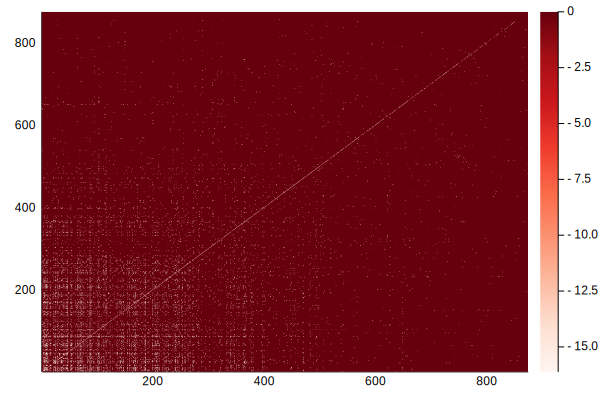

In [104]:
heatmap(Matrix(adjmat), color=:Reds)

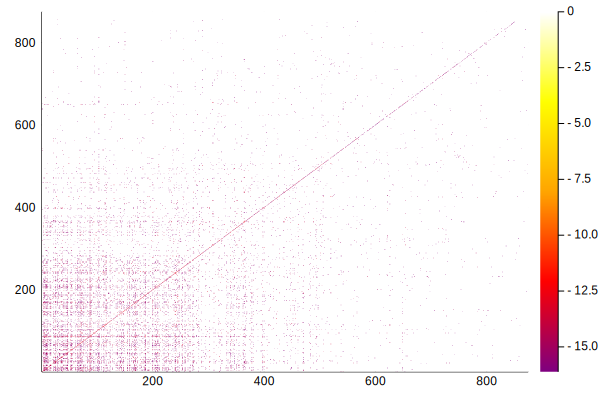

In [105]:
heatmap(Matrix(adjmat),color=cgrad([:purple, :red, :orange, :yellow, :white]))

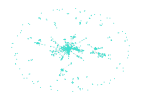

In [106]:
gplot(Graph((adjmat'+adjmat).<0))

In [84]:
size(adjmat)

(645, 645)